In [1]:
using LinearAlgebra
using Plots

En esta demostración implementaremos el método de elementos finitos para resolver el ejercicio de la Práctica 2 para un número arbitrario de elementos con un área variable.

In [3]:

# Juntemos todo el codigo en una funcion que nos permita cambiar el numero de elementos
function EF1D(E,A,l,Ne,b,F)
    le=l/Ne #tomamos elementos con longitudes iguales
    function N(x,i) #Definimos las funciones de forma lineales
        if x>le*(i-2) && x<le*(i-1)
            return (x-le*(i-2))/le
        elseif x>=le*(i-1) && x<le*(i)
            return (le*(i)-x)/le
        else
            return 0
        end
    end
# Creamos la matriz elemental y el vector de fuerza elemental
    Ke=zeros(2,2,Ne)
    for i=1:Ne
        Ke[:,:,i]=E*A((i-1/2)*le)/le*[1 -1;-1 1]
    end
    fe=b*le/2*[1; 1]
# Creamos la matriz y el vector global y ensamblamos
    K=zeros(Ne+1,Ne+1)
    f=zeros(Ne+1)
    for i=1:Ne
        K[i:i+1,i:i+1]+=Ke[:,:,i]
        f[i:i+1]+=fe
    end
    f[end]+=F
# Resolvemos el sistema de ecuaciones reducido
    uh=K[2:end,2:end]\f[2:end]
    uh=[0;uh]
# Sumamos las soluciones locales para obtener la solucion global
    x=0:0.01:l
    u=0*x
    for i=1:Ne+1
        u+=uh[i]*N.(x,i)
    end
    
    return u
end

EF1D (generic function with 1 method)

In [4]:
#Definimos la función del área
function A(x)
    return 0.5+x/8
end

A (generic function with 1 method)

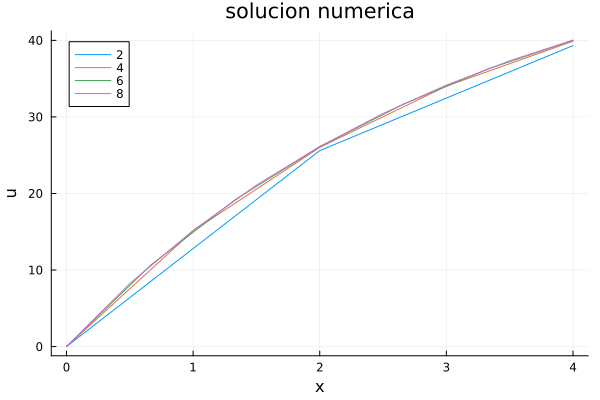

In [15]:
# Probemos el metodo con distintas cantidades de elementos y graficamos
x=0:0.01:4
plot(xlabel='x',ylabel='u')
for n in 2:2:8
    u=EF1D(1,A,4,n,1,5)
    plot!(x,u,label=n)
end
plot!(title="solucion numerica")